In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import scipy.linalg as linalg
import sklearn.linear_model
import sklearn.model_selection
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import load_iris
from IPython.display import Markdown as md
from gensim.models import KeyedVectors
import warnings
warnings.filterwarnings('ignore')

# Applied Machine Learning

## Non-parametrics

In [3]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

### Embeddings

- Last time we talked about efficient way to encode words
- We didn't discuss how to use these vectors though

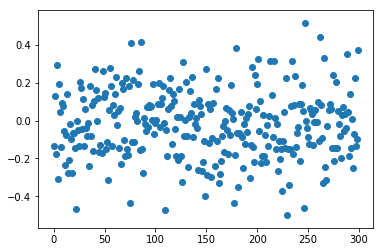

In [12]:
vector = model.get_vector('embedding'); plt.scatter(range(len(vector)), vector);

### Distributed representation

- Word embeddings are examples of distributed representation
- The meaning is in all the features
- There is no meaning of any single feature (most of the time)
- Can we apply decision tree for such data?

### Locality

- The number of possible cases in distributed representation would make learning impossible
- Embeddings of similar words differ *not that much*
- We need a method that would enjoy this property

What are the synonyms of **happy**?

In [14]:
model.most_similar('happy', topn=5)

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912951469421),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514050364494324)]

What are the synonyms of **angry** then?

In [18]:
model.most_similar('angry', topn=5)

[('irate', 0.8138925433158875),
 ('enraged', 0.770506739616394),
 ('indignant', 0.701343297958374),
 ('incensed', 0.688130795955658),
 ('annoyed', 0.6847161650657654)]

### Word sentiment

- Let us consider a problem of classifying words by their sentiment
- We have a list of words that are marked positive or negative

In [20]:
positive_words = ['happy']
negative_words = ['angry']

### Nearest neighbor

- The simplest approach for classification: assign the label of the nearest object

In [29]:
word = 'delighted'
positive_distance = min([model.distance(word, x) for x in positive_words])
negative_distance = min([model.distance(word, x) for x in negative_words])
if positive_distance < negative_distance:
    print(word, 'is', 'positive')
else:
    print(word, 'is', 'negative')

delighted is positive


### Engineering the distance

- The distance between two word embeddings is computed via cosine
- What is the distance for usual features we have?

In [39]:
?distance([1.0, 2.0], [3.0, 2.5])

Object `distance` not found.


### Euclidean distance

- The most widely used distance
- Requires normalization
- Doesn't like noisy features much

In [42]:
np.sqrt(np.sum((np.array([1.0, 2.0]) - np.array([3.0, 2.5]))**2))

2.0615528128088303

### Pitfalls

- Distance should be engineered carefully
- Does the method treat noisy data well?

### k nearest neighbor

- An extension of the nearest neighbor method that everyone uses
- The word's sentiment is positive if most of it's $k$ similar ones are positive
- How does the complexity change if we change $k$?

In [60]:
from sklearn.neighbors import KNeighborsRegressor

### Fast neighbor search

In [61]:
knn = KNeighborsRegressor(algorithm='ball_tree')
knn

KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

### When is it a good idea to use kNN?

- You have numerical data that you can normalize
- You believe to have no useless features
- The dimensionality is not that high
- Usually it is good addition to your ensemble

### The 'Concrete' dataset

In [62]:
df = pd.read_excel('Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Let's prepare the data, split into train/test/validation and train the model

### Adding more complexity

- The main parameter is $k$, the number of nearest neighbors to consider
- We don't use distance much yet:

In [57]:
KNeighborsRegressor(weights='distance')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

### Weights of instances

- What if we had weights for instances?
- We might try to come up with a rule for instance weights 
- The best possible thing would be to optimize these weights directly

### Support Vector Machine

- Family of methods that are based on idea to learn the weights of training examples (vectors)
- The vectors that have non-zero weights are *support* ones

In [59]:
from sklearn.svm import SVR

### Kernels

- Instead of choosing the distance, in SVM you choose the kernel
- Kernel is a measure of similarity
- The usual choice is gaussian kernel

### How's that non-parametric?

- Linear models and decision trees are constructing something out of the training data
- All the methods we just considered are using the training data itself
- Using the data and making predictions out of it directly is called non-parametric

### Pros and cons

- Can work on small datasets pretty well
- Would not scale to really large datasets
- Do not work well on mixed type data, do not handle missing values, etc
- Some methods are theoretically grounded, the next one in particular

### Gaussian Processes

- An instance of Bayesian methods that are out of scope of the course

Nonetheless, let's try:

In [44]:
from sklearn.gaussian_process import GaussianProcessRegressor

### Prophet

- Practical application of gaussian processes and bayesian methods in general
- A library for time-series prediction

In [72]:
from fbprophet import Prophet

### Retail sales dataset

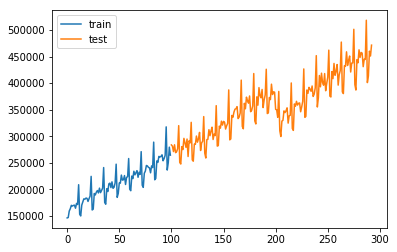

In [73]:
df = pd.read_csv('example_retail_sales.csv', dtype={'ds': str, 'y': np.float64})
ax = df[:100].rename(columns={'y': 'train'}).plot();
ax = df[100:].rename(columns={'y': 'test'}).plot(ax=ax);

### Training the model

In [84]:
model = Prophet(weekly_seasonality=False, daily_seasonality=False)
model.fit(df[:100]);

### Predicting the future

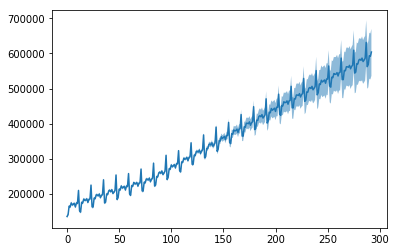

In [81]:
predictions = model.predict(df)
plt.fill_between(predictions.index, predictions['yhat_lower'], predictions['yhat_upper'], alpha=0.5)
plt.plot(predictions['yhat']);

### Next class

Unsupervised learning: clustering